## Importing Library

In [1]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

Numpy is especially used for matrix multiplication as well as other mathematical operations
Matplotlib on other hand is useful for plotting graphs and visualization purpose.

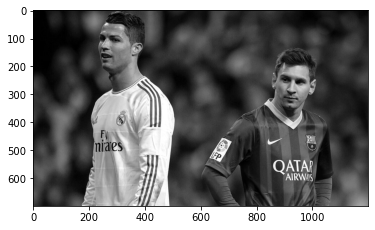

In [2]:
img = cv.imread('Elclasico.jpg', cv.IMREAD_GRAYSCALE)
plt.imshow(img,cmap="gray")

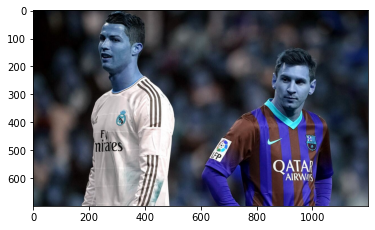

In [3]:
image = cv.imread('Elclasico.jpg')
plt.imshow(image)

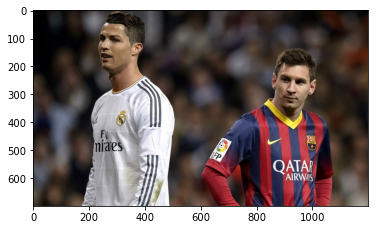

In [4]:
image_channels_reversed = image[:, :, ::-1]
plt.imshow(image_channels_reversed)

In [5]:
img = cv.imread('Elclasico.jpg', cv.IMREAD_GRAYSCALE)

In [6]:
img2 = img.copy()
template = cv.imread('messi.jpg', cv.IMREAD_GRAYSCALE)
w, h = template.shape[::-1]
#removes channel info from image

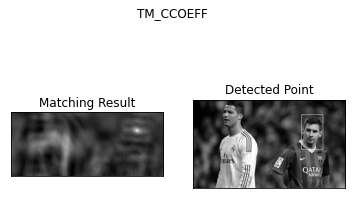

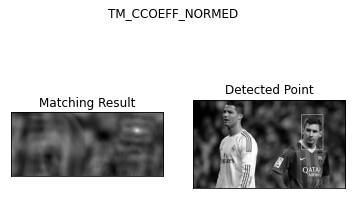

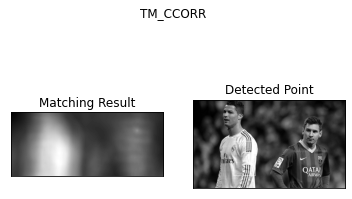

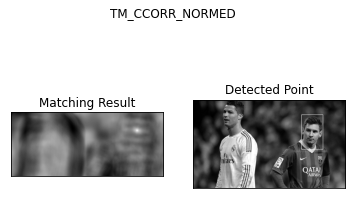

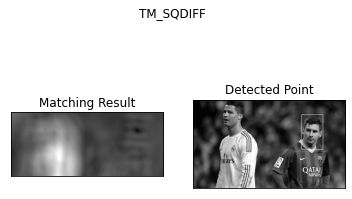

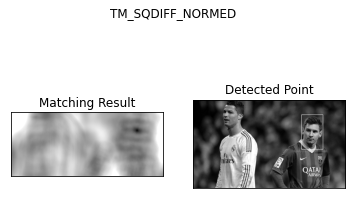

In [7]:
methods = ['TM_CCOEFF', 'TM_CCOEFF_NORMED', 'TM_CCORR',
            'TM_CCORR_NORMED', 'TM_SQDIFF', 'TM_SQDIFF_NORMED']
 
for meth in methods:
    img = img2.copy()
    method = getattr(cv, meth)
 
    # Apply template Matching
    res = cv.matchTemplate(img,template,method)
    min_val, max_val, min_loc, max_loc = cv.minMaxLoc(res)
 
    # If the method is TM_SQDIFF or TM_SQDIFF_NORMED, take minimum
    if method in [cv.TM_SQDIFF, cv.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
    bottom_right = (top_left[0] + w, top_left[1] + h)
 
    cv.rectangle(img,top_left, bottom_right, 255, 2)
 
    plt.subplot(121),plt.imshow(res,cmap = 'gray')
    plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(img,cmap = 'gray')
    plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
    plt.suptitle(meth)
 
    plt.show()

TM_CCORR” (cross-correlation) is not considered to be an ideal choice as seen by the result. This is due to the fact that it cannot accommodate intensity variations in image and is sensitive to it. The original image is rich and there is a lot of variation in intensity due to which it was not able to identify the template.